# Checkpoint 1             :                Data Cleaning

# Companies File

In [145]:
import pandas as pd
import numpy as np

# Import companies data file

###########################################################################################################

#########################################IMPORTANT ASSUMPTION##############################################

#This code expects that "companies.txt" file is located in the same folder location as this python notebook
###########################################################################################################

companies = pd.read_csv("companies.txt", sep = "\t", encoding = "ISO-8859-1")
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [146]:
companies.shape

(66368, 10)

In [147]:
companies.permalink.unique().shape

(66368,)

In [148]:
round((companies.isnull().sum()/len(companies.index)) * 100, 2)

permalink         0.00
name              0.00
homepage_url      7.62
category_list     4.74
status            0.00
country_code     10.48
state_code       12.88
region           12.10
city             12.10
founded_at       22.93
dtype: float64

In [149]:
companies.drop(["state_code", "region", "city", "founded_at", "homepage_url"], inplace = True, axis=1)

In [150]:
# Check null percentage in the remaining columns

round((companies.isnull().sum()/len(companies.index)) * 100, 2)

permalink         0.00
name              0.00
category_list     4.74
status            0.00
country_code     10.48
dtype: float64

In [151]:
companies[companies["category_list"].isnull()].head()

,permalink,name,category_list,status,country_code
56,/Organization/123Feng-Com,123Feng.Com,NaN,operating,CHN
71,/Organization/15Fen,15Fen,NaN,operating,CHN
79,/Organization/17-Media,17 Media,NaN,operating,NaN
109,/Organization/1Mxians,1mxians,NaN,operating,CHN
113,/Organization/1Rp-Media,1RP Media,NaN,operating,USA


In [152]:
companies.shape

(66368, 5)

In [153]:
# From the dataframe, eliminate rows with NULL Category list

companies = companies[~pd.isnull(companies["category_list"])]

In [154]:
companies.shape

(63220, 5)

In [155]:
# After the cleanup, now check the null percentage so that the appropriate clean up action can be undertaken

round((companies.isnull().sum()/ len(companies.index)) * 100, 2)

permalink        0.00
name             0.00
category_list    0.00
status           0.00
country_code     8.57
dtype: float64

In [156]:
companies[pd.isnull(companies["country_code"])]

,permalink,name,category_list,status,country_code
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN
21,/Organization/1000Chi,Beijing 1000CHI Software Technology,Mobile,operating,NaN
35,/Organization/10K-2,Beans Around,Coffee|Delivery|Subscription Service,operating,NaN
39,/Organization/10Tracks-2,10tracks,iOS|Mobile|Music,operating,NaN
45,/Organization/115-Network-Disks,115 network disks,EdTech|Education,operating,NaN
54,/Organization/1234Enter,1234ENTER,Advertising|Analytics|Business Services|E-Comm...,operating,NaN
57,/Organization/123Greetings,123Greetings,Internet,operating,NaN
73,/Organization/15Minutesnow,15MinutesNOW,Games,operating,NaN
84,/Organization/1800Diapers,1800Diapers,Baby Accessories|Kids,operating,NaN
105,/Organization/1Lay,1Lay,Mobile|Mobile Devices|Mobile Security|Security...,operating,NaN


In [157]:
companies["country_code"] = companies["country_code"].astype('category')

companies["country_code"].value_counts()

USA    36655
GBR     3599
CAN     1875
IND     1552
CHN     1502
FRA     1109
DEU     1035
ISR      943
ESP      737
AUS      485
NLD      472
RUS      452
SGP      443
BRA      434
IRL      434
SWE      427
ITA      392
JPN      376
KOR      342
CHL      331
CHE      323
DNK      285
FIN      275
HKG      202
BEL      202
ARG      185
TUR      174
POL      147
MEX      141
AUT      129
       ...  
NIC        2
ZMB        2
GIB        2
MAR        2
PRI        2
PSE        2
KWT        2
OMN        1
PRY        1
DMA        1
BLM        1
SEN        1
SOM        1
SYC        1
TGO        1
UZB        1
QAT        1
MNE        1
MOZ        1
DZA        1
MAF        1
BRB        1
BRN        1
KAZ        1
JEY        1
IRN        1
HND        1
GRD        1
GGY        1
KNA        1
Name: country_code, Length: 137, dtype: int64

In [158]:
companies = companies[~pd.isnull(companies["country_code"])]

In [159]:
# Now ensuring that all the missing data in the file is handled and cleaned

round((companies.isnull().sum()/ len(companies.index)) * 100, 2)

permalink        0.0
name             0.0
category_list    0.0
status           0.0
country_code     0.0
dtype: float64

In [160]:
companies.shape

(57804, 5)

In [161]:
# Percentage of rows lost

round((len(companies.index)/ 663638) * 100, 2)

8.71

# Rounds file

In [162]:
# Import rounds2 file
########################################################################################################################################
##                                                  IMPORTANT ASSUMPTION                                             ##

#This code expects that the "rounds2.csv" file is placed in the same location as the python notebook being executed####
########################################################################################################################################

rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")

In [163]:
rounds2.shape

(114949, 6)

In [164]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [165]:
rounds2.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [166]:
# Check the null percentage in rounds2 file

round((rounds2.isnull().sum()/ len(rounds2.index) * 100),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [167]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [168]:
rounds2.drop("funding_round_code", inplace = True, axis=1)

In [169]:
round((rounds2.isnull().sum()/ len(rounds2.index) * 100),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [170]:
rounds2.groupby("funding_round_type")["raised_amount_usd"].sum()

funding_round_type
angel                    4.659255e+09
convertible_note         2.103126e+09
debt_financing           1.138848e+11
equity_crowdfunding      6.611162e+08
grant                    9.134424e+09
non_equity_assistance    3.001782e+07
post_ipo_debt            2.564309e+10
post_ipo_equity          5.161061e+10
private_equity           1.419254e+11
product_crowdfunding     5.261686e+08
secondary_market         2.389489e+09
seed                     1.698986e+10
undisclosed              3.044143e+10
venture                  5.901262e+11
Name: raised_amount_usd, dtype: float64

In [171]:
median = rounds2["raised_amount_usd"].median()

In [172]:
rounds2["raised_amount_usd"].fillna(median, inplace = True)

In [173]:
rounds2.groupby("funding_round_type")["raised_amount_usd"].sum()

funding_round_type
angel                    6.733006e+09
convertible_note         2.724915e+09
debt_financing           1.142428e+11
equity_crowdfunding      4.070873e+09
grant                    9.262143e+09
non_equity_assistance    2.283181e+08
post_ipo_debt            2.564309e+10
post_ipo_equity          5.162741e+10
private_equity           1.425119e+11
product_crowdfunding     5.665009e+08
secondary_market         2.498722e+09
seed                     2.862068e+10
undisclosed              3.601232e+10
venture                  5.989758e+11
Name: raised_amount_usd, dtype: float64

In [174]:
# Now ensuring that, all missing data in rounds2 file is handled

round((rounds2.isnull().sum()/ len(rounds2.index) * 100),2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [175]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [176]:
rounds2_comp_perm = rounds2["company_permalink"]
rounds2_comp_perm_split = list(map(lambda x: x.title().split("/"), rounds2_comp_perm))
rounds2["company_permalink_new"] = list(map(lambda x: "/".join(x), rounds2_comp_perm_split))

In [177]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0,/Organization/-Qounter
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,/Organization/-Qounter
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/Organization/0-6-Com


In [178]:
rounds2.company_permalink_new.unique().size

66370

In [179]:
rounds2[~rounds2["company_permalink_new"].isin(companies["permalink"])]

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,/Organization/-The-One-Of-Them-Inc-
32,/organization/1000chi,/funding-round/854fae13c5b26b2ea6b32b06c2e5890c,angel,01-04-2010,43923865.0,/Organization/1000Chi
66,/organization/10k-2,/funding-round/95401c8e8336892bf375ad94efd6c725,seed,04-09-2015,100000.0,/Organization/10K-2
71,/ORGANIZATION/10TRACKS-2,/funding-round/74606b480fe509973a3d72c9017876ca,venture,03-02-2014,1680511.0,/Organization/10Tracks-2
72,/organization/10tracks-2,/funding-round/e31e2474786f930fd72e292ec34e9126,seed,31-07-2013,1680511.0,/Organization/10Tracks-2
79,/ORGANIZATION/115-NETWORK-DISKS,/funding-round/0966b3b472f4b912e167abaf8d06f77d,angel,01-11-2011,1680511.0,/Organization/115-Network-Disks
95,/ORGANIZATION/1234ENTER,/funding-round/6343322ed785252d4c5ada444fa7d8e4,venture,22-11-2013,150267.0,/Organization/1234Enter
96,/organization/1234enter,/funding-round/ee6f9dea78c9a0697a500098a854564d,seed,01-09-2012,500000.0,/Organization/1234Enter
99,/ORGANIZATION/123FENG-COM,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,27-10-2015,13000000.0,/Organization/123Feng-Com
100,/organization/123greetings,/funding-round/5dd1821a92088ff96b467eb16431731a,venture,23-07-2015,5400000.0,/Organization/123Greetings


In [180]:
# No rows have been lost

round((len(rounds2.index) / 114949) * 100, 2)

100.0

In [181]:
master_frame = pd.merge(rounds2, companies, how = 'inner', left_on = 'company_permalink_new', right_on = 'permalink')

In [182]:
master_frame.shape

(104532, 11)

In [183]:
master_frame[master_frame["funding_round_type"].isin(["venture", "seed", "private_equity"])].groupby("funding_round_type")["raised_amount_usd"].sum()

funding_round_type
private_equity    1.349630e+11
seed              2.475368e+10
venture           5.676067e+11
Name: raised_amount_usd, dtype: float64

In [184]:
master_frame[master_frame["funding_round_type"].isin(["venture", "seed", "private_equity"])].groupby("funding_round_type")["raised_amount_usd"].mean()

funding_round_type
private_equity    6.567541e+07
seed              9.362916e+05
venture           1.091048e+07
Name: raised_amount_usd, dtype: float64

# Checkpoint 2       :           Funding Type Analysis

In [185]:
mf_funding_type_mean = master_frame.groupby("funding_round_type")["raised_amount_usd"].mean().reset_index()
mf_funding_type_mean = mf_funding_type_mean.rename(columns = {"raised_amount_usd":"avg_raised_amount_usd"})
#mf_funding_type_mean["avg_raised_amount_usd"] = mf_funding_type_mean.apply(lambda row: '$' + str(round(row["avg_raised_amount_usd"]/ 1000000,2)) + 'M', axis=1)
mf_funding_type_mean

,funding_round_type,avg_raised_amount_usd
0,angel,1.104671e+06
1,convertible_note,1.402992e+06
2,debt_financing,1.671698e+07
3,equity_crowdfunding,1.235915e+06
4,grant,4.424944e+06
5,non_equity_assistance,1.151206e+06
6,post_ipo_debt,1.694518e+08
7,post_ipo_equity,6.501790e+07
8,private_equity,6.567541e+07
9,product_crowdfunding,1.372808e+06


In [186]:
# Total funding amount by funding round type

mf_funding_type_sum = master_frame.groupby("funding_round_type")["raised_amount_usd"].sum().reset_index()
mf_funding_type_sum = mf_funding_type_sum.rename(columns = {"raised_amount_usd":"total_raised_amount_usd"})
mf_funding_type_sum

,funding_round_type,total_raised_amount_usd
0,angel,5.984005e+09
1,convertible_note,2.291086e+09
2,debt_financing,1.120205e+11
3,equity_crowdfunding,3.670666e+09
4,grant,8.854314e+09
5,non_equity_assistance,1.565640e+08
6,post_ipo_debt,2.558722e+10
7,post_ipo_equity,3.953089e+10
8,private_equity,1.349630e+11
9,product_crowdfunding,4.818556e+08


In [187]:
mf_funding_type_mean

,funding_round_type,avg_raised_amount_usd
0,angel,1.104671e+06
1,convertible_note,1.402992e+06
2,debt_financing,1.671698e+07
3,equity_crowdfunding,1.235915e+06
4,grant,4.424944e+06
5,non_equity_assistance,1.151206e+06
6,post_ipo_debt,1.694518e+08
7,post_ipo_equity,6.501790e+07
8,private_equity,6.567541e+07
9,product_crowdfunding,1.372808e+06


In [188]:
########################################################################################################################################
##    Purpose of this command is to choose the investment type most suitable for Spark funds                         ##
##    Based on the guidelines provided in the case study problem statement, the fund type that Spark funds           ##
##    would like to choose is from on of the 4 - Venture, Angel, Seed, Private Equity, if the assumption changes,    ##
##    following values would need to be updated                                                                      ##
##    1. min_range & max_range
##    2. funding_types shortlisted by Spark
##    It is also expected that among the shortlist, more than one funding round type would not lie in the range
#######################################################################################################################

min_range = 5000000
max_range = 15000000

spark_shortlist_fund_types = mf_funding_type_mean[mf_funding_type_mean["funding_round_type"].isin(["venture", "angel", "seed", "private_equity"])]
spark_chosen_funding_type = spark_shortlist_fund_types[(spark_shortlist_fund_types["avg_raised_amount_usd"] >= min_range) & (spark_shortlist_fund_types["avg_raised_amount_usd"] <= max_range)]["funding_round_type"].tolist()[0]
spark_chosen_funding_type

'venture'

In [189]:
# This dataframe consists of average and total amount per rounding type to be able to plot a graph

mf_avg_sum = pd.merge(mf_funding_type_mean[mf_funding_type_mean["funding_round_type"].isin(["venture", "private_equity", "seed"])], mf_funding_type_sum, how = "inner", left_on = "funding_round_type", right_on = "funding_round_type")
mf_avg_sum["total_raised_amount_usd_pct"] = round((mf_avg_sum["total_raised_amount_usd"]/mf_avg_sum["total_raised_amount_usd"].sum()) * 100, 2)
mf_avg_sum.info()

mf_avg_sum

mf_avg_sum.info()
mf_avg_sum = mf_avg_sum.set_index("funding_round_type")
mf_avg_sum

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 4 columns):
funding_round_type             3 non-null object
avg_raised_amount_usd          3 non-null float64
total_raised_amount_usd        3 non-null float64
total_raised_amount_usd_pct    3 non-null float64
dtypes: float64(3), object(1)
memory usage: 120.0+ bytes
<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 4 columns):
funding_round_type             3 non-null object
avg_raised_amount_usd          3 non-null float64
total_raised_amount_usd        3 non-null float64
total_raised_amount_usd_pct    3 non-null float64
dtypes: float64(3), object(1)
memory usage: 120.0+ bytes


,avg_raised_amount_usd,total_raised_amount_usd,total_raised_amount_usd_pct
funding_round_type,,,
private_equity,6.567541e+07,1.349630e+11,18.56
seed,9.362916e+05,2.475368e+10,3.40
venture,1.091048e+07,5.676067e+11,78.04


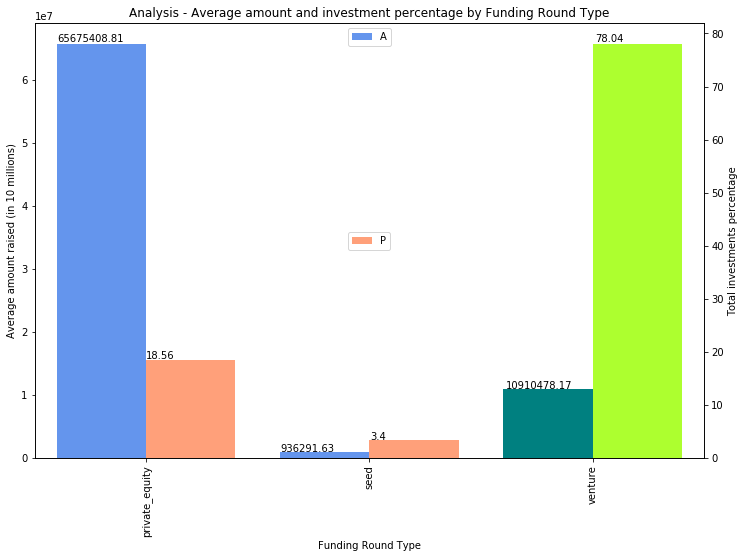

In [190]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(12, 8)
#fig.set_size_inches(16, 12)

ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.twinx

width = 0.4

mf_avg_sum.avg_raised_amount_usd.plot(kind='bar', color='cornflowerblue', ax=ax, width=width, position=1)
mf_avg_sum.total_raised_amount_usd_pct.plot(kind='bar', color='lightsalmon', ax=ax2, width=width, position=0)

# Since venture is the most suitable and needs to be highlighted, it is being set with a distinct color

pos = mf_avg_sum.index.get_loc("venture")
ax2.patches[pos].set_facecolor('greenyellow')
ax.patches[pos].set_facecolor('teal')

ax.set_xlabel("Funding Round Type")
ax.set_ylabel("Average amount raised (in 10 millions)")
ax2.set_ylabel("Total investments percentage")
ax.legend("Avg", loc = 9)
ax2.legend("Pct", loc = 10)
xticks, xticklabels = plt.xticks()
plt.title("Analysis - Average amount and investment percentage by Funding Round Type")
#plt.tight_layout()

# shift half a step to the left
xmin = (3*xticks[0] - xticks[1])/2.
# shift half a step to the right
xmax = (3*xticks[-1] - xticks[-2])/2.
plt.xlim(xmin, xmax)
plt.xticks(xticks)

for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 2)), (round(p.get_x() * 1.005, 2), round(p.get_height() * 1.005, 2)))

for p in ax2.patches:
    ax2.annotate(str((p.get_height())), ((p.get_x() * 1.005), (p.get_height() * 1.005)))
    
plt.show()
#plt.savefig('Fig1.png')

In [191]:
master_frame_venture = master_frame[master_frame["funding_round_type"] == spark_chosen_funding_type].copy(deep = True)

In [192]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 104526
Data columns (total 11 columns):
company_permalink          52024 non-null object
funding_round_permalink    52024 non-null object
funding_round_type         52024 non-null object
funded_at                  52024 non-null object
raised_amount_usd          52024 non-null float64
company_permalink_new      52024 non-null object
permalink                  52024 non-null object
name                       52024 non-null object
category_list              52024 non-null object
status                     52024 non-null object
country_code               52024 non-null category
dtypes: category(1), float64(1), object(9)
memory usage: 4.5+ MB


# Checkpoint 3    :     Country Analysis

In [193]:
#top9 = master_frame_venture.groupby("country_code")["raised_amount_usd"].sum().reset_index().sort_values(by = "raised_amount_usd", ascending = False).head(9)
top9 = master_frame_venture.groupby("country_code")["raised_amount_usd"].sum().nlargest(9).reset_index()

In [194]:
top9

,country_code,raised_amount_usd
0,USA,4.235820e+11
1,CHN,4.018422e+10
2,GBR,2.044925e+10
3,IND,1.453879e+10
4,CAN,9.625061e+09
5,FRA,7.326002e+09
6,ISR,7.040887e+09
7,DEU,6.674954e+09
8,JPN,3.233187e+09


In [195]:
import PyPDF2
import io
import urllib
from urllib.request import Request, urlopen
    
try:
    from StringIO import StringIO
except ImportError:
    from io import StringIO

# Read the file containing list of english speaking country names    
f = urllib.request.urlopen("http://www.emmir.org/fileadmin/user_upload/admission/Countries_where_English_is_an_official_language.pdf").read()
f = io.BytesIO(f)

# reading the pdf file
pdf_reader = PyPDF2.PdfFileReader(f)

# get a certain page's text
page_object = pdf_reader.getPage(0)

# Extract text from the page_object
text = page_object.extractText()
new_text = text.split("\n")

# Separate the country names on the basis of the initial letter being upper case and create a list namely "english_countries"
import re
english_countries = re.findall('[A-Z][^A-Z]*', text)

# Eliminate trailing new line chacters and other unnecessary characters
english_countries = list(map(lambda x: x.rstrip("\n"), english_countries))
english_countries = list(map(lambda x: x.rstrip("/"), english_countries))
english_countries = list(map(lambda x: x.strip("/"), english_countries))

# Concatenate the members of the english countries to create a new string concat_countries     
concat_countries = " ".join(english_countries)  

In [79]:
# Use the python country library to retrieve the country name based on the country code
# If the country name exists in the string "concat_countries" above, return True indicating the the 3 character 
# country code is english speaking else False

def check_english_country(country_code):

    import pycountry

    try:
        country_record = pycountry.countries.get(alpha_3=country_code)
        country_name = country_record.name
    except:
        country_name = "Unknown"
    
    return(country_name in concat_countries)
    


In [80]:
top9

,country_code,raised_amount_usd
0,USA,4.235820e+11
1,CHN,4.018422e+10
2,GBR,2.044925e+10
3,IND,1.453879e+10
4,CAN,9.625061e+09
5,FRA,7.326002e+09
6,ISR,7.040887e+09
7,DEU,6.674954e+09
8,JPN,3.233187e+09


In [81]:
top9["english_country"] = top9["country_code"].apply(check_english_country)
top9

,country_code,raised_amount_usd,english_country
0,USA,4.235820e+11,True
1,CHN,4.018422e+10,False
2,GBR,2.044925e+10,True
3,IND,1.453879e+10,True
4,CAN,9.625061e+09,True
5,FRA,7.326002e+09,False
6,ISR,7.040887e+09,False
7,DEU,6.674954e+09,False
8,JPN,3.233187e+09,False


In [86]:
top3_english = top9[top9["english_country"] == True].head(3)
top3_english

,country_code,raised_amount_usd,english_country,Language
0,USA,4.235820e+11,True,Top 3 English speaking
2,GBR,2.044925e+10,True,Top 3 English speaking
3,IND,1.453879e+10,True,Top 3 English speaking


In [90]:
# Setting the values up so that legend is displayed correctly

top9.loc[top9["country_code"].isin(top3_english["country_code"].tolist()), "Language"] = "Top 3 English speaking"
top9.loc[~top9["country_code"].isin(top3_english["country_code"].tolist()), "Language"] = "Others"

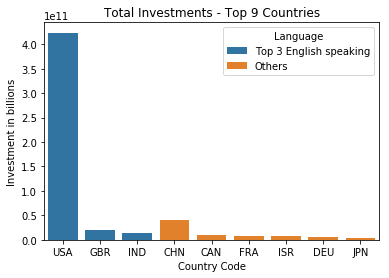

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = sns.barplot(x = "country_code", y = "raised_amount_usd", hue = "Language", data = top9, dodge = False, order=["USA", "GBR", "IND", "CHN", "CAN", "FRA", "ISR", "DEU", "JPN"])

plt.xlabel("Country Code")
plt.ylabel("Investment in billions")
plt.title("Total Investments - Top 9 Countries")
plt.show()
#plt.savefig('Fig2.png')

In [92]:
####################################################################################################################
#### 
##          Code expects that the file "mapping.csv" exists in the same folder as the python notebook to be executed ##
####################################################################################################################

mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

In [93]:
mapping

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,0,1,0,0,0,0
6,Ad Targeting,0,0,0,0,0,0,0,0,1
7,Advanced Materials,0,0,0,0,0,1,0,0,0
8,Adventure Travel,1,0,0,0,0,0,0,0,0
9,Advertising,0,0,0,0,0,0,0,0,1


In [94]:
mapping = mapping.dropna()

In [95]:
master_frame_venture["category_list_new"] = master_frame_venture["category_list"].str.split("|")
master_frame_venture["category_list_new"] = master_frame_venture["category_list_new"].apply(lambda x: x[0])

In [96]:
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,category_list_new
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame,/Organization/-Fame,#fame,Media,operating,IND,Media
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,1680511.0,/Organization/-Qounter,/Organization/-Qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,Application Platforms
3,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,/Organization/0-6-Com,/Organization/0-6-Com,0-6.com,Curated Web,operating,CHN,Curated Web
4,/ORGANIZATION/004-TECHNOLOGIES,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,24-07-2014,1680511.0,/Organization/004-Technologies,/Organization/004-Technologies,004 Technologies,Software,operating,USA,Software
7,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/Organization/0Ndine-Biomedical-Inc,/Organization/0Ndine-Biomedical-Inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,Biotechnology


In [97]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 104526
Data columns (total 12 columns):
company_permalink          52024 non-null object
funding_round_permalink    52024 non-null object
funding_round_type         52024 non-null object
funded_at                  52024 non-null object
raised_amount_usd          52024 non-null float64
company_permalink_new      52024 non-null object
permalink                  52024 non-null object
name                       52024 non-null object
category_list              52024 non-null object
status                     52024 non-null object
country_code               52024 non-null category
category_list_new          52024 non-null object
dtypes: category(1), float64(1), object(10)
memory usage: 4.9+ MB


In [98]:
new_mapping = mapping.pivot_table(columns = 'category_list')
new_mapping.reset_index().sort_values(["index"])

mapping_unpivot = pd.melt(mapping, id_vars = ['category_list'], value_vars = ['Automotive & Sports', 'Blanks',
       'Cleantech / Semiconductors', 'Entertainment', 'Health',
       'Manufacturing', 'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising'])
mapping_unpivot = mapping_unpivot.dropna()
mapping_unpivot.head()

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0


In [99]:
mapping_unpivot = mapping_unpivot[mapping_unpivot["value"] == 1]
mapping_unpivot.head()

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [100]:
#Cleanse the data in category list column
import re

mapping_unpivot["category_list"] = mapping_unpivot["category_list"].apply(lambda x: re.sub(r"0", "na", x))
mapping_unpivot.head()

,category_list,variable,value
7,Adventure Travel,Automotive & Sports,1
13,Aerospace,Automotive & Sports,1
44,Auto,Automotive & Sports,1
45,Automated Kiosk,Automotive & Sports,1
46,Automotive,Automotive & Sports,1


In [101]:
# This is a scenario where genuine 0 also got replaced by na

mapping_unpivot["category_list"] = mapping_unpivot["category_list"].apply(lambda x: re.sub(r"2.na", "2.0", x))

In [102]:
mapping_unpivot[mapping_unpivot["category_list"] == "Enterprise 2.0"]

,category_list,variable,value
5051,Enterprise 2.0,Others,1


In [103]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52024 entries, 0 to 104526
Data columns (total 12 columns):
company_permalink          52024 non-null object
funding_round_permalink    52024 non-null object
funding_round_type         52024 non-null object
funded_at                  52024 non-null object
raised_amount_usd          52024 non-null float64
company_permalink_new      52024 non-null object
permalink                  52024 non-null object
name                       52024 non-null object
category_list              52024 non-null object
status                     52024 non-null object
country_code               52024 non-null category
category_list_new          52024 non-null object
dtypes: category(1), float64(1), object(10)
memory usage: 4.9+ MB


In [104]:
# Carry out a merge between master_frame and mapping so that main sector can be added as a new column

master_frame_venture = pd.merge(master_frame_venture, mapping_unpivot, how = "inner", left_on = "category_list_new", right_on = "category_list")
master_frame_venture.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list_x,status,country_code,category_list_new,category_list_y,variable,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame,/Organization/-Fame,#fame,Media,operating,IND,Media,Media,Entertainment,1
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/Organization/All-Def-Digital,/Organization/All-Def-Digital,All Def Digital,Media,operating,USA,Media,Media,Entertainment,1


In [105]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51829 entries, 0 to 51828
Data columns (total 15 columns):
company_permalink          51829 non-null object
funding_round_permalink    51829 non-null object
funding_round_type         51829 non-null object
funded_at                  51829 non-null object
raised_amount_usd          51829 non-null float64
company_permalink_new      51829 non-null object
permalink                  51829 non-null object
name                       51829 non-null object
category_list_x            51829 non-null object
status                     51829 non-null object
country_code               51829 non-null category
category_list_new          51829 non-null object
category_list_y            51829 non-null object
variable                   51829 non-null object
value                      51829 non-null int64
dtypes: category(1), float64(1), int64(1), object(12)
memory usage: 6.0+ MB


In [106]:
# Rename the columns to something more meaningful

master_frame_venture.rename(columns={"variable": "main_sector", "category_list_new": "primary_sector"}, inplace=True)

In [107]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51829 entries, 0 to 51828
Data columns (total 15 columns):
company_permalink          51829 non-null object
funding_round_permalink    51829 non-null object
funding_round_type         51829 non-null object
funded_at                  51829 non-null object
raised_amount_usd          51829 non-null float64
company_permalink_new      51829 non-null object
permalink                  51829 non-null object
name                       51829 non-null object
category_list_x            51829 non-null object
status                     51829 non-null object
country_code               51829 non-null category
primary_sector             51829 non-null object
category_list_y            51829 non-null object
main_sector                51829 non-null object
value                      51829 non-null int64
dtypes: category(1), float64(1), int64(1), object(12)
memory usage: 6.0+ MB


In [108]:
master_frame_venture

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame,/Organization/-Fame,#fame,Media,operating,IND,Media,Media,Entertainment,1
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/Organization/All-Def-Digital,/Organization/All-Def-Digital,All Def Digital,Media,operating,USA,Media,Media,Entertainment,1
5,/ORGANIZATION/AUDIOSOCKET,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,/Organization/Audiosocket,/Organization/Audiosocket,Audiosocket,Media|Music|Technology,operating,USA,Media,Media,Entertainment,1
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,/Organization/Audiosocket,/Organization/Audiosocket,Audiosocket,Media|Music|Technology,operating,USA,Media,Media,Entertainment,1
7,/ORGANIZATION/AUDIOSOCKET,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,/Organization/Audiosocket,/Organization/Audiosocket,Audiosocket,Media|Music|Technology,operating,USA,Media,Media,Entertainment,1
8,/ORGANIZATION/BABBLE,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.0,/Organization/Babble,/Organization/Babble,Babble,Media|News|Parenting,acquired,USA,Media,Media,Entertainment,1
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.0,/Organization/Babble,/Organization/Babble,Babble,Media|News|Parenting,acquired,USA,Media,Media,Entertainment,1


# Checkpoint 5:          Sector Analysis 2

In [109]:
master_frame_venture = master_frame_venture.loc[master_frame_venture["country_code"].isin(top3_english["country_code"].tolist())].copy(deep = True)

In [110]:
master_frame_venture

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame,/Organization/-Fame,#fame,Media,operating,IND,Media,Media,Entertainment,1
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/Organization/All-Def-Digital,/Organization/All-Def-Digital,All Def Digital,Media,operating,USA,Media,Media,Entertainment,1
5,/ORGANIZATION/AUDIOSOCKET,/funding-round/0959f59e3a89bc8db8c6ed9c646349fd,venture,02-05-2013,650000.0,/Organization/Audiosocket,/Organization/Audiosocket,Audiosocket,Media|Music|Technology,operating,USA,Media,Media,Entertainment,1
6,/organization/audiosocket,/funding-round/4e3a53eec6c609943df752206070b23f,venture,02-09-2009,750000.0,/Organization/Audiosocket,/Organization/Audiosocket,Audiosocket,Media|Music|Technology,operating,USA,Media,Media,Entertainment,1
7,/ORGANIZATION/AUDIOSOCKET,/funding-round/bc0b412cf2fa7b739e4105ad756b47a4,venture,15-02-2012,1582300.0,/Organization/Audiosocket,/Organization/Audiosocket,Audiosocket,Media|Music|Technology,operating,USA,Media,Media,Entertainment,1
8,/ORGANIZATION/BABBLE,/funding-round/43cc678b39be3e684bb88501af05ff9b,venture,05-02-2009,2000000.0,/Organization/Babble,/Organization/Babble,Babble,Media|News|Parenting,acquired,USA,Media,Media,Entertainment,1
9,/organization/babble,/funding-round/5fdb3dbeeb6eea0243702adc372130f3,venture,12-05-2009,1250000.0,/Organization/Babble,/Organization/Babble,Babble,Media|News|Parenting,acquired,USA,Media,Media,Entertainment,1


In [111]:
master_frame_venture = master_frame_venture[(master_frame_venture["raised_amount_usd"] >= 5000000) & (master_frame_venture["raised_amount_usd"] <= 15000000)].copy(deep = True)

In [112]:
master_frame_venture.shape

(12959, 15)

In [113]:
top_3_english_countries = master_frame_venture.country_code.unique()
top_3_english_countries

[IND, GBR, USA]
Categories (3, object): [IND, GBR, USA]

In [114]:
master_frame_venture

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector,value
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame,/Organization/-Fame,#fame,Media,operating,IND,Media,Media,Entertainment,1
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
2,/ORGANIZATION/90MIN,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,/Organization/90Min,/Organization/90Min,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,Media,Media,Entertainment,1
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,/Organization/All-Def-Digital,/Organization/All-Def-Digital,All Def Digital,Media,operating,USA,Media,Media,Entertainment,1
16,/ORGANIZATION/CHEFS-FEED,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.0,/Organization/Chefs-Feed,/Organization/Chefs-Feed,ChefsFeed,Media|Mobile|Restaurants|Technology,operating,USA,Media,Media,Entertainment,1
25,/ORGANIZATION/HUFFINGTONPOST,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.0,/Organization/Huffingtonpost,/Organization/Huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,Media,Media,Entertainment,1
26,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.0,/Organization/Huffingtonpost,/Organization/Huffingtonpost,The Huffington Post,Media|News|Publishing,acquired,USA,Media,Media,Entertainment,1
36,/ORGANIZATION/MATCHMINE,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.0,/Organization/Matchmine,/Organization/Matchmine,MatchMine,Media|News|Reviews and Recommendations,closed,USA,Media,Media,Entertainment,1
38,/organization/mediabong,/funding-round/9282890ca87072025dc1807f400acee6,venture,13-05-2015,5000000.0,/Organization/Mediabong,/Organization/Mediabong,MEDIABONG,Media|Semantic Search|Video,operating,USA,Media,Media,Entertainment,1
42,/organization/newscorporation,/funding-round/8f6d7c4592e43e91e8688ba342bffcb7,venture,08-01-2010,12500000.0,/Organization/Newscorporation,/Organization/Newscorporation,News Corp,Media|News|Publishing,ipo,USA,Media,Media,Entertainment,1


In [115]:
master_frame_venture.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12959 entries, 0 to 51822
Data columns (total 15 columns):
company_permalink          12959 non-null object
funding_round_permalink    12959 non-null object
funding_round_type         12959 non-null object
funded_at                  12959 non-null object
raised_amount_usd          12959 non-null float64
company_permalink_new      12959 non-null object
permalink                  12959 non-null object
name                       12959 non-null object
category_list_x            12959 non-null object
status                     12959 non-null object
country_code               12959 non-null category
primary_sector             12959 non-null object
category_list_y            12959 non-null object
main_sector                12959 non-null object
value                      12959 non-null int64
dtypes: category(1), float64(1), int64(1), object(12)
memory usage: 1.5+ MB


In [116]:
mf_groupby_amt = master_frame_venture.groupby(["country_code", "main_sector"])["raised_amount_usd"].sum().reset_index()
mf_groupby_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
country_code         24 non-null category
main_sector          24 non-null object
raised_amount_usd    24 non-null float64
dtypes: category(1), float64(1), object(1)
memory usage: 6.6+ KB


In [117]:
mf_groupby_amt.sort_values(by = ["country_code", "raised_amount_usd"], ascending = False)

,country_code,main_sector,raised_amount_usd
22,USA,Others,2.632101e+10
23,USA,"Social, Finance, Analytics, Advertising",2.380738e+10
17,USA,Cleantech / Semiconductors,2.120663e+10
21,USA,"News, Search and Messaging",1.395957e+10
19,USA,Health,8.211859e+09
20,USA,Manufacturing,7.258553e+09
18,USA,Entertainment,5.099198e+09
16,USA,Automotive & Sports,1.454104e+09
14,IND,Others,1.013410e+09
15,IND,"Social, Finance, Analytics, Advertising",5.505496e+08


In [118]:
mf_groupby_cnt = master_frame_venture.groupby(["country_code", "main_sector"])["raised_amount_usd"].count().reset_index()
mf_groupby_cnt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 3 columns):
country_code         24 non-null category
main_sector          24 non-null object
raised_amount_usd    24 non-null int64
dtypes: category(1), int64(1), object(1)
memory usage: 6.6+ KB


In [119]:
mf_groupby_cnt.sort_values(by = ["country_code", "raised_amount_usd"], ascending = False)

,country_code,main_sector,raised_amount_usd
22,USA,Others,2950
23,USA,"Social, Finance, Analytics, Advertising",2714
17,USA,Cleantech / Semiconductors,2300
21,USA,"News, Search and Messaging",1582
19,USA,Health,909
20,USA,Manufacturing,799
18,USA,Entertainment,591
16,USA,Automotive & Sports,167
14,IND,Others,110
15,IND,"Social, Finance, Analytics, Advertising",60


In [120]:
master_frame_all = pd.merge(pd.merge(master_frame_venture, mf_groupby_amt, how = "inner", left_on = ["country_code", "main_sector"], right_on = ["country_code", "main_sector"]), mf_groupby_cnt, how = "inner", left_on = ["country_code", "main_sector"], right_on = ["country_code", "main_sector"]).copy(deep=True)
master_frame_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12959 entries, 0 to 12958
Data columns (total 17 columns):
company_permalink          12959 non-null object
funding_round_permalink    12959 non-null object
funding_round_type         12959 non-null object
funded_at                  12959 non-null object
raised_amount_usd_x        12959 non-null float64
company_permalink_new      12959 non-null object
permalink                  12959 non-null object
name                       12959 non-null object
category_list_x            12959 non-null object
status                     12959 non-null object
country_code               12959 non-null category
primary_sector             12959 non-null object
category_list_y            12959 non-null object
main_sector                12959 non-null object
value                      12959 non-null int64
raised_amount_usd_y        12959 non-null float64
raised_amount_usd          12959 non-null int64
dtypes: category(1), float64(2), int64(2), object(12)
me

In [121]:
master_frame_all.rename(columns = {"raised_amount_usd_y": "sector_amt", "raised_amount_usd": "sector_count", "raised_amount_usd_x": "raised_amount_usd", "category_list_x": "category_list"}, inplace = True)

In [122]:
master_frame_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12959 entries, 0 to 12958
Data columns (total 17 columns):
company_permalink          12959 non-null object
funding_round_permalink    12959 non-null object
funding_round_type         12959 non-null object
funded_at                  12959 non-null object
raised_amount_usd          12959 non-null float64
company_permalink_new      12959 non-null object
permalink                  12959 non-null object
name                       12959 non-null object
category_list              12959 non-null object
status                     12959 non-null object
country_code               12959 non-null category
primary_sector             12959 non-null object
category_list_y            12959 non-null object
main_sector                12959 non-null object
value                      12959 non-null int64
sector_amt                 12959 non-null float64
sector_count               12959 non-null int64
dtypes: category(1), float64(2), int64(2), object(12)
me

In [123]:
master_frame_all.country_code.unique()

[IND, GBR, USA]
Categories (3, object): [IND, GBR, USA]

In [124]:
mf_all_count = master_frame_all.groupby("country_code")["permalink"].count().reset_index()
mf_all_count = mf_all_count.loc[mf_all_count["permalink"] != 0].reset_index(drop = True)
mf_all_count


,country_code,permalink
0,GBR,619
1,IND,328
2,USA,12012


In [125]:
master_frame_all

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/Organization/-Fame,/Organization/-Fame,#fame,Media,operating,IND,Media,Media,Entertainment,1,2.808300e+08,33
1,/ORGANIZATION/DHRUVA,/funding-round/6035248811c9530b11bd442d9239a0b1,venture,27-11-2006,5000000.0,/Organization/Dhruva,/Organization/Dhruva,Dhruva,Games,operating,IND,Games,Games,Entertainment,1,2.808300e+08,33
2,/organization/games2win,/funding-round/6b024f4906c288c66d1df966e6aeb256,venture,29-03-2007,5000000.0,/Organization/Games2Win,/Organization/Games2Win,Games2Win,Games,operating,IND,Games,Games,Entertainment,1,2.808300e+08,33
3,/organization/games2win,/funding-round/b095563fd43d1e4fd16da3f4bcd040af,venture,30-03-2011,6000000.0,/Organization/Games2Win,/Organization/Games2Win,Games2Win,Games,operating,IND,Games,Games,Entertainment,1,2.808300e+08,33
4,/organization/pokkt,/funding-round/adb94c131e001a7438a4695d873d8dc1,venture,03-11-2015,5000000.0,/Organization/Pokkt,/Organization/Pokkt,POKKT,Games,operating,IND,Games,Games,Entertainment,1,2.808300e+08,33
5,/organization/taggle-internet-ventures-private,/funding-round/e9948bcf99cef341ba917e917bd1ec3d,venture,23-06-2010,8750000.0,/Organization/Taggle-Internet-Ventures-Private,/Organization/Taggle-Internet-Ventures-Private,Taggle Internet Ventures Private,Games,closed,IND,Games,Games,Entertainment,1,2.808300e+08,33
6,/ORGANIZATION/CLEARTRIP,/funding-round/9948b3e11a512230539666870fe8a6fa,venture,12-12-2006,8000000.0,/Organization/Cleartrip,/Organization/Cleartrip,Cleartrip,Travel,operating,IND,Travel,Travel,Entertainment,1,2.808300e+08,33
7,/organization/cleartrip,/funding-round/b71847894698280ebac4cadf5fc83ed4,venture,12-05-2014,5400000.0,/Organization/Cleartrip,/Organization/Cleartrip,Cleartrip,Travel,operating,IND,Travel,Travel,Entertainment,1,2.808300e+08,33
8,/organization/tripfactory,/funding-round/96cb159e796b822f988b5e85ad35db63,venture,31-07-2015,10000000.0,/Organization/Tripfactory,/Organization/Tripfactory,Tripfactory,Travel,operating,IND,Travel,Travel,Entertainment,1,2.808300e+08,33
9,/ORGANIZATION/VIA-3,/funding-round/b4fd1f5501f0d2151e068836762af021,venture,06-06-2007,5000000.0,/Organization/Via-3,/Organization/Via-3,Via,Travel,operating,IND,Travel,Travel,Entertainment,1,2.808300e+08,33


In [126]:
mf_all_amt = master_frame_all.groupby("country_code")["raised_amount_usd"].sum().reset_index().copy(deep = True)
mf_all_amt = mf_all_amt[~pd.isnull(mf_all_amt["raised_amount_usd"])].copy(deep = True)
mf_all_amt = mf_all_amt.sort_values(by = "raised_amount_usd", ascending = False).reset_index(drop = True)
mf_all_amt["raised_amount_usd"] = mf_all_amt.apply(lambda row: '$' + str(round(row["raised_amount_usd"]/ 1000000,2)) + 'M', axis=1)
mf_all_amt

,country_code,raised_amount_usd
0,USA,$107318.29M
1,GBR,$5365.23M
2,IND,$2949.54M


In [127]:
top_3_english_countries[2]

'USA'

In [128]:
D1 = master_frame_all[master_frame_all["country_code"] == top_3_english_countries[2]]
D2 = master_frame_all[master_frame_all["country_code"] == top_3_english_countries[1]]
D3 = master_frame_all[master_frame_all["country_code"] == top_3_english_countries[0]]

In [129]:
top1_country_sectors = mf_groupby_cnt[mf_groupby_cnt["country_code"] == top_3_english_countries[2]].sort_values(by = "raised_amount_usd", ascending = False)
top1_country_sectors

,country_code,main_sector,raised_amount_usd
22,USA,Others,2950
23,USA,"Social, Finance, Analytics, Advertising",2714
17,USA,Cleantech / Semiconductors,2300
21,USA,"News, Search and Messaging",1582
19,USA,Health,909
20,USA,Manufacturing,799
18,USA,Entertainment,591
16,USA,Automotive & Sports,167


In [130]:
top1_country_sectors.iloc[[0]].main_sector.tolist()[0]


'Others'

In [131]:
D1[D1["main_sector"] == top1_country_sectors.iloc[[0]].main_sector.tolist()[0]].sort_values(by = "raised_amount_usd", ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
2721,/ORGANIZATION/FORMATION-DATA-SYSTEMS,/funding-round/b2b8a8afefc8a4d451fc8237b41d80f4,venture,01-07-2014,15000000.0,/Organization/Formation-Data-Systems,/Organization/Formation-Data-Systems,Formation Data Systems,Software,operating,USA,Software,Software,Others,1,2.632101e+10,2950
3897,/ORGANIZATION/MOKA5,/funding-round/198e910c331d91e6c257a04e18efd482,venture,01-01-2007,15000000.0,/Organization/Moka5,/Organization/Moka5,moka5,Enterprise Software|Software,operating,USA,Enterprise Software,Enterprise Software,Others,1,2.632101e+10,2950
3937,/organization/onesource-virtual,/funding-round/69ce209cb89235310f849ebaba90088d,venture,06-03-2013,15000000.0,/Organization/Onesource-Virtual,/Organization/Onesource-Virtual,OneSource Virtual,Enterprise Software,operating,USA,Enterprise Software,Enterprise Software,Others,1,2.632101e+10,2950
3102,/organization/qwilt,/funding-round/697c15dad17f452da14e906d2fdbf7c2,venture,19-10-2011,15000000.0,/Organization/Qwilt,/Organization/Qwilt,Qwilt,Software,operating,USA,Software,Software,Others,1,2.632101e+10,2950
3106,/ORGANIZATION/RAINFINITY,/funding-round/b0774da4aabc3e8039f1a264e0b8d2cf,venture,02-12-1999,15000000.0,/Organization/Rainfinity,/Organization/Rainfinity,Rainfinity,Software,acquired,USA,Software,Software,Others,1,2.632101e+10,2950
3921,/ORGANIZATION/NEWSCALE,/funding-round/e092d17cf9c51601c8d6a5ccff250e0a,venture,29-03-2005,15000000.0,/Organization/Newscale,/Organization/Newscale,newScale,Enterprise Software,acquired,USA,Enterprise Software,Enterprise Software,Others,1,2.632101e+10,2950
3915,/ORGANIZATION/NETCONTINUUM,/funding-round/630a574acae55b6ec32b8a9447af1451,venture,17-10-2005,15000000.0,/Organization/Netcontinuum,/Organization/Netcontinuum,Netcontinuum,Enterprise Software,acquired,USA,Enterprise Software,Enterprise Software,Others,1,2.632101e+10,2950
3905,/ORGANIZATION/MULESOFT,/funding-round/21ac990f7399b93dd990b6627ae6b1ec,venture,18-05-2012,15000000.0,/Organization/Mulesoft,/Organization/Mulesoft,MuleSoft,Enterprise Software,operating,USA,Enterprise Software,Enterprise Software,Others,1,2.632101e+10,2950
4865,/ORGANIZATION/BREAKINGPOINT-SYSTEMS,/funding-round/571f04ccaba2107de5bf2a486f87ab20,venture,12-11-2007,15000000.0,/Organization/Breakingpoint-Systems,/Organization/Breakingpoint-Systems,BreakingPoint Systems,Security,acquired,USA,Security,Security,Others,1,2.632101e+10,2950
2544,/organization/cassatt,/funding-round/7927e6811cc3360fd916a6c0a091e686,venture,01-03-2006,15000000.0,/Organization/Cassatt,/Organization/Cassatt,Cassatt,Software,acquired,USA,Software,Software,Others,1,2.632101e+10,2950


In [132]:
D1[D1["main_sector"] == top1_country_sectors.iloc[[1]].main_sector.tolist()[0]].sort_values(by = "raised_amount_usd", ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
8489,/ORGANIZATION/SUMO-LOGIC,/funding-round/ce3d0d344ff02449ad62565602bbcce1,venture,31-01-2012,15000000.0,/Organization/Sumo-Logic,/Organization/Sumo-Logic,Sumo Logic,Analytics,operating,USA,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
9608,/organization/sourcefire,/funding-round/8d9303e6c734f339970a977f4d382783,venture,27-01-2004,15000000.0,/Organization/Sourcefire,/Organization/Sourcefire,Sourcefire,Information Technology|Software,acquired,USA,Information Technology,Information Technology,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
8759,/ORGANIZATION/EYEVIEW,/funding-round/9648593f9b1aea4a961a8c3de3525ab0,venture,17-11-2014,15000000.0,/Organization/Eyeview,/Organization/Eyeview,Eyeview,Advertising|Online Video Advertising|Video,operating,USA,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
9150,/ORGANIZATION/TONGAL,/funding-round/a1d234bb0475a1efb67fb40fd557b035,venture,26-12-2012,15000000.0,/Organization/Tongal,/Organization/Tongal,Tongal,Advertising|Crowdsourcing|Curated Web|Entertai...,operating,USA,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
9476,/organization/rocana,/funding-round/a74acbe67eeb277784300ba337abf421,venture,30-04-2015,15000000.0,/Organization/Rocana,/Organization/Rocana,Rocana,Big Data|Databases|Information Technology,operating,USA,Big Data,Big Data,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
9335,/organization/kroll-bond-rating-agency,/funding-round/a622374e28d377f6d19d7fd85f4a1f5c,venture,05-08-2013,15000000.0,/Organization/Kroll-Bond-Rating-Agency,/Organization/Kroll-Bond-Rating-Agency,Kroll Bond Rating Agency,Finance,operating,USA,Finance,Finance,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
9736,/organization/yummly,/funding-round/dff90af3d3203dc453666fa9e87984c0,venture,01-09-2015,15000000.0,/Organization/Yummly,/Organization/Yummly,Yummly,Android|Content Discovery|Cooking|Developer AP...,operating,USA,Android,Android,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
8177,/organization/demandbase,/funding-round/0d2485c568b802b8bf8ef9c37a382293,venture,28-03-2013,15000000.0,/Organization/Demandbase,/Organization/Demandbase,Demandbase,Analytics|Internet Marketing|SaaS,operating,USA,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
9730,/organization/textplus,/funding-round/e3b0ac485f335fc0386a6a051187f1b9,venture,24-02-2011,15000000.0,/Organization/Textplus,/Organization/Textplus,textPlus,Android|Communities|iPad|iPhone|Messaging|Mobile,operating,USA,Android,Android,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714
8179,/organization/demandbase,/funding-round/3dba04b0bc54568ff5784c4abdbd1254,venture,13-10-2014,15000000.0,/Organization/Demandbase,/Organization/Demandbase,Demandbase,Analytics|Internet Marketing|SaaS,operating,USA,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1,2.380738e+10,2714


In [133]:
top2_country_sectors = mf_groupby_cnt[mf_groupby_cnt["country_code"] == top_3_english_countries[1]].sort_values(by = "raised_amount_usd", ascending = False)
top2_country_sectors

,country_code,main_sector,raised_amount_usd
6,GBR,Others,147
7,GBR,"Social, Finance, Analytics, Advertising",133
1,GBR,Cleantech / Semiconductors,128
5,GBR,"News, Search and Messaging",73
2,GBR,Entertainment,56
4,GBR,Manufacturing,42
3,GBR,Health,24
0,GBR,Automotive & Sports,16


In [134]:
D2[D2["main_sector"] == top2_country_sectors.iloc[[0]].main_sector.tolist()[0]].sort_values(by = "raised_amount_usd", ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
5568,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,09-04-2008,15000000.0,/Organization/Sensage,/Organization/Sensage,SenSage,Security,acquired,GBR,Security,Security,Others,1,1.283624e+09,147
5463,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,06-03-2006,15000000.0,/Organization/Environmentiq,/Organization/Environmentiq,EnvironmentIQ,Software,operating,GBR,Software,Software,Others,1,1.283624e+09,147
5449,/ORGANIZATION/AZURE-SOLUTIONS,/funding-round/adb99f479490e33281ab358ba9da2b29,venture,16-06-2005,15000000.0,/Organization/Azure-Solutions,/Organization/Azure-Solutions,Azure Solutions,Software,acquired,GBR,Software,Software,Others,1,1.283624e+09,147
5483,/ORGANIZATION/TRIBOLD,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,22-03-2007,15000000.0,/Organization/Tribold,/Organization/Tribold,Tribold,Software,acquired,GBR,Software,Software,Others,1,1.283624e+09,147
5540,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,21-05-2012,15000000.0,/Organization/Notonthehighstreet,/Organization/Notonthehighstreet,Notonthehighstreet,E-Commerce,operating,GBR,E-Commerce,E-Commerce,Others,1,1.283624e+09,147
5553,/organization/silverrail-technologies,/funding-round/6816b97b970b7b95395f903ce1dd6d0d,venture,21-03-2012,15000000.0,/Organization/Silverrail-Technologies,/Organization/Silverrail-Technologies,SilverRail Technologies,Technology|Transportation|Travel,operating,GBR,Technology,Technology,Others,1,1.283624e+09,147
5466,/ORGANIZATION/IP-ACCESS,/funding-round/4321163564fddf7a26b7235d7c791941,venture,12-12-2011,15000000.0,/Organization/Ip-Access,/Organization/Ip-Access,ip.access,Software,operating,GBR,Software,Software,Others,1,1.283624e+09,147
5539,/organization/myoptique-group,/funding-round/2c959c6ff6c5958c29388be295288d58,venture,21-04-2009,14656237.0,/Organization/Myoptique-Group,/Organization/Myoptique-Group,MyOptique Group,E-Commerce,operating,GBR,E-Commerce,E-Commerce,Others,1,1.283624e+09,147
5548,/ORGANIZATION/UKASH,/funding-round/74e9144a6356af4c9a01486f731ce1e8,venture,29-09-2008,14400000.0,/Organization/Ukash,/Organization/Ukash,KaliteUKASH,E-Commerce|Finance|FinTech|P2P Money Transfer|...,operating,GBR,E-Commerce,E-Commerce,Others,1,1.283624e+09,147
5542,/ORGANIZATION/OCAPO,/funding-round/13a507388b97c4da8f5707dab21d9112,venture,04-07-2013,14394888.0,/Organization/Ocapo,/Organization/Ocapo,Ocapo,E-Commerce,operating,GBR,E-Commerce,E-Commerce,Others,1,1.283624e+09,147


In [135]:
D2[D2["main_sector"] == top2_country_sectors.iloc[[1]].main_sector.tolist()[0]].sort_values(by = "raised_amount_usd", ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
10814,/ORGANIZATION/ZOPA,/funding-round/4b0740cb83da8d2af9d221e5455f8923,venture,01-03-2006,15000000.0,/Organization/Zopa,/Organization/Zopa,Zopa,Finance|FinTech,operating,GBR,Finance,Finance,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10789,/ORGANIZATION/SIMILARWEB,/funding-round/71de07b07ac7f6b7348a72a231e4ae3f,venture,25-11-2014,15000000.0,/Organization/Similarweb,/Organization/Similarweb,SimilarWeb,Advertising|Analytics|Business Intelligence|Bu...,operating,GBR,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10840,/organization/mythings,/funding-round/33b07317347464878c1fd06c79a18e8c,venture,20-03-2012,15000000.0,/Organization/Mythings,/Organization/Mythings,myThings,Accounting|Advertising|Performance Marketing,operating,GBR,Accounting,Accounting,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10859,/ORGANIZATION/OPENGAMMA,/funding-round/e67645665f1fa87fe5df76f960b6247f,venture,08-08-2012,15000000.0,/Organization/Opengamma,/Organization/Opengamma,OpenGamma,Financial Services|FinTech|Open Source|Software,operating,GBR,Financial Services,Financial Services,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10791,/organization/sportpursuit,/funding-round/234aabb5f5b4735a2b2f84bc176dc887,venture,22-11-2015,14448230.0,/Organization/Sportpursuit,/Organization/Sportpursuit,SportPursuit,Advertising|E-Commerce|Flash Sales|Retail|Sports,operating,GBR,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10780,/ORGANIZATION/IMAGINI,/funding-round/b271bb72b17b3c7007c17f39d0d7ac1a,venture,25-02-2009,13550000.0,/Organization/Imagini,/Organization/Imagini,VisualDNA,Advertising|Analytics|Big Data|Credit|Finance ...,operating,GBR,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10856,/organization/purplebricks,/funding-round/3d87dbf9b740946b2b86317b06c35679,venture,18-08-2014,13364740.0,/Organization/Purplebricks,/Organization/Purplebricks,PurpleBricks,Business Services|Marketing Automation|Marketp...,operating,GBR,Business Services,Business Services,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10825,/ORGANIZATION/SUMUP,/funding-round/fc12977627489aa222218209b3c98ab2,venture,13-08-2014,13000000.0,/Organization/Sumup,/Organization/Sumup,SumUp,Credit Cards|Mobile|Mobile Payments,operating,GBR,Credit Cards,Credit Cards,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10777,/organization/icrossing,/funding-round/81e54cb8419bad137696c58e9edb4653,venture,13-07-2005,13000000.0,/Organization/Icrossing,/Organization/Icrossing,iCrossing,Advertising|Business Services|Internet Marketi...,acquired,GBR,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133
10813,/organization/zopa,/funding-round/2a55d435c3433d8f903526c050c19361,venture,20-03-2007,12900000.0,/Organization/Zopa,/Organization/Zopa,Zopa,Finance|FinTech,operating,GBR,Finance,Finance,"Social, Finance, Analytics, Advertising",1,1.089404e+09,133


In [136]:
top3_country_sectors = mf_groupby_cnt[mf_groupby_cnt["country_code"] == top_3_english_countries[0]].sort_values(by = "raised_amount_usd", ascending = False)
top3_country_sectors

,country_code,main_sector,raised_amount_usd
14,IND,Others,110
15,IND,"Social, Finance, Analytics, Advertising",60
13,IND,"News, Search and Messaging",52
10,IND,Entertainment,33
12,IND,Manufacturing,21
9,IND,Cleantech / Semiconductors,20
11,IND,Health,19
8,IND,Automotive & Sports,13


In [137]:
D3[D3["main_sector"] == top3_country_sectors.iloc[[0]].main_sector.tolist()[0]].sort_values(by = "raised_amount_usd", ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
5417,/organization/tejas-networks-india,/funding-round/ca35a0fd045367f9b501a9a433e2c907,venture,06-01-2005,15000000.0,/Organization/Tejas-Networks-India,/Organization/Tejas-Networks-India,Tejas Networks India,Web Hosting,operating,IND,Web Hosting,Web Hosting,Others,1,1.013410e+09,110
5404,/organization/roposo,/funding-round/0f647fc9ce894a49ec19697b6ab4deab,venture,17-08-2015,15000000.0,/Organization/Roposo,/Organization/Roposo,Roposo,E-Commerce|Fashion,operating,IND,E-Commerce,E-Commerce,Others,1,1.013410e+09,110
5378,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15000000.0,/Organization/Caratlane,/Organization/Caratlane,CaratLane,E-Commerce|Jewelry,operating,IND,E-Commerce,E-Commerce,Others,1,1.013410e+09,110
5420,/ORGANIZATION/IPOLICY-NETWORKS,/funding-round/5960ab7542caab51f2b89207bebd258b,venture,04-10-2005,15000000.0,/Organization/Ipolicy-Networks,/Organization/Ipolicy-Networks,iPolicy Networks,Security,operating,IND,Security,Security,Others,1,1.013410e+09,110
5383,/ORGANIZATION/FIRSTCRY-COM,/funding-round/23b1769412d24510dfc7a56ab1f12e4d,venture,21-01-2014,15000000.0,/Organization/Firstcry-Com,/Organization/Firstcry-Com,FirstCry.com,E-Commerce,operating,IND,E-Commerce,E-Commerce,Others,1,1.013410e+09,110
5426,/organization/commonfloor,/funding-round/2d3d9f68e6902613d06d2aa77852381c,venture,08-01-2015,15000000.0,/Organization/Commonfloor,/Organization/Commonfloor,CommonFloor,Real Estate,operating,IND,Real Estate,Real Estate,Others,1,1.013410e+09,110
5369,/ORGANIZATION/ZO-ROOMS,/funding-round/c88cfb5fe8cc31d33a07b73aa97c0e04,venture,20-07-2015,15000000.0,/Organization/Zo-Rooms,/Organization/Zo-Rooms,ZO Rooms,Hospitality|Hotels,operating,IND,Hospitality,Hospitality,Others,1,1.013410e+09,110
5370,/organization/girnarsoft,/funding-round/f5be3a7b98fb70b0e2b1d019357dd782,venture,20-11-2013,15000000.0,/Organization/Girnarsoft,/Organization/Girnarsoft,GirnarSoft,Enterprise Software|Mobile Software Tools|Mobi...,operating,IND,Enterprise Software,Enterprise Software,Others,1,1.013410e+09,110
5442,/ORGANIZATION/COMAT-TECHNOLOGIES,/funding-round/4d24857fc321f2d54c16573a085b090c,venture,01-10-2008,15000000.0,/Organization/Comat-Technologies,/Organization/Comat-Technologies,Comat Technologies,Governments|Health and Insurance,closed,IND,Governments,Governments,Others,1,1.013410e+09,110
5411,/ORGANIZATION/VOYLLA-RETAIL-PVT-LTD,/funding-round/e75b35919cefc102295d2be82651c6a2,venture,05-10-2015,15000000.0,/Organization/Voylla-Retail-Pvt-Ltd,/Organization/Voylla-Retail-Pvt-Ltd,Voylla Retail Pvt. Ltd.,E-Commerce,operating,IND,E-Commerce,E-Commerce,Others,1,1.013410e+09,110


In [138]:
D3[D3["main_sector"] == top3_country_sectors.iloc[[1]].main_sector.tolist()[0]].sort_values(by = "raised_amount_usd", ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,company_permalink_new,permalink,name,category_list,status,country_code,primary_sector,category_list_y,main_sector,value,sector_amt,sector_count
10920,/ORGANIZATION/SHIRAM-CREDIT,/funding-round/b1dcdcad5a014b976c3adeeef467e244,venture,18-09-2011,15000000.0,/Organization/Shiram-Credit,/Organization/Shiram-Credit,Shiram Credit,Finance,operating,IND,Finance,Finance,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10895,/ORGANIZATION/MANTHAN-SYSTEMS,/funding-round/a08435c935a0a43cd9069ad9480f8bb6,venture,20-11-2009,15000000.0,/Organization/Manthan-Systems,/Organization/Manthan-Systems,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10903,/organization/komli-media,/funding-round/905a09df7016ecdbedd0cc837f98aa42,venture,19-01-2011,15000000.0,/Organization/Komli-Media,/Organization/Komli-Media,Komli Media,Advertising|Analytics|Media,operating,IND,Advertising,Advertising,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10938,/ORGANIZATION/APNALOAN,/funding-round/43f871c060118fcdf5316b3bf0797618,venture,01-12-2007,15000000.0,/Organization/Apnaloan,/Organization/Apnaloan,ApnaPaisa,Credit|Finance|Marketplaces,operating,IND,Credit,Credit,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10942,/ORGANIZATION/SHOPCLUES-COM,/funding-round/f0525d1aeb1a5d4581d49156ee7fa3e6,venture,01-03-2014,15000000.0,/Organization/Shopclues-Com,/Organization/Shopclues-Com,ShopClues.com,Consumer Internet|E-Commerce|Shopping,operating,IND,Consumer Internet,Consumer Internet,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10910,/organization/financial-information-network-op...,/funding-round/fff5471135f5744c4c1062d674350b82,venture,09-12-2009,15000000.0,/Organization/Financial-Information-Network-Op...,/Organization/Financial-Information-Network-Op...,Financial Information Network & Operations Pvt,Finance|FinTech,closed,IND,Finance,Finance,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10894,/organization/manthan-systems,/funding-round/7db541211550feab15626b11aa479116,venture,15-02-2012,15000000.0,/Organization/Manthan-Systems,/Organization/Manthan-Systems,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10893,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,09-12-2009,15000000.0,/Organization/Manthan-Systems,/Organization/Manthan-Systems,Manthan Systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,Analytics,Analytics,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10947,/organization/travelguru,/funding-round/58803fbf70b28cbc0a721859898678d3,venture,29-11-2006,15000000.0,/Organization/Travelguru,/Organization/Travelguru,TravelGuru,Career Planning|Curated Web|Transportation|Travel,acquired,IND,Career Planning,Career Planning,"Social, Finance, Analytics, Advertising",1,550549550.0,60
10927,/organization/intarvo,/funding-round/110588de9cebb60f7eee1bdc304f0b82,venture,17-09-2009,14000000.0,/Organization/Intarvo,/Organization/Intarvo,inTarvo,Consulting|Outsourcing,operating,IND,Consulting,Consulting,"Social, Finance, Analytics, Advertising",1,550549550.0,60


In [139]:
mf_all_amt

,country_code,raised_amount_usd
0,USA,$107318.29M
1,GBR,$5365.23M
2,IND,$2949.54M


In [140]:
master_frame_all.country_code.unique()

[IND, GBR, USA]
Categories (3, object): [IND, GBR, USA]

In [141]:
mf_all_amt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
country_code         3 non-null category
raised_amount_usd    3 non-null object
dtypes: category(1), object(1)
memory usage: 6.2+ KB


In [142]:
final_top_3 = master_frame_all.groupby(["country_code", "main_sector"])["raised_amount_usd"].count().reset_index()

In [143]:
final_top_3 = final_top_3.groupby('country_code', group_keys= False).apply(lambda g: g.nlargest(3, "raised_amount_usd")).reset_index(drop = True)
final_top_3

,country_code,main_sector,raised_amount_usd
0,GBR,Others,147
1,GBR,"Social, Finance, Analytics, Advertising",133
2,GBR,Cleantech / Semiconductors,128
3,IND,Others,110
4,IND,"Social, Finance, Analytics, Advertising",60
5,IND,"News, Search and Messaging",52
6,USA,Others,2950
7,USA,"Social, Finance, Analytics, Advertising",2714
8,USA,Cleantech / Semiconductors,2300


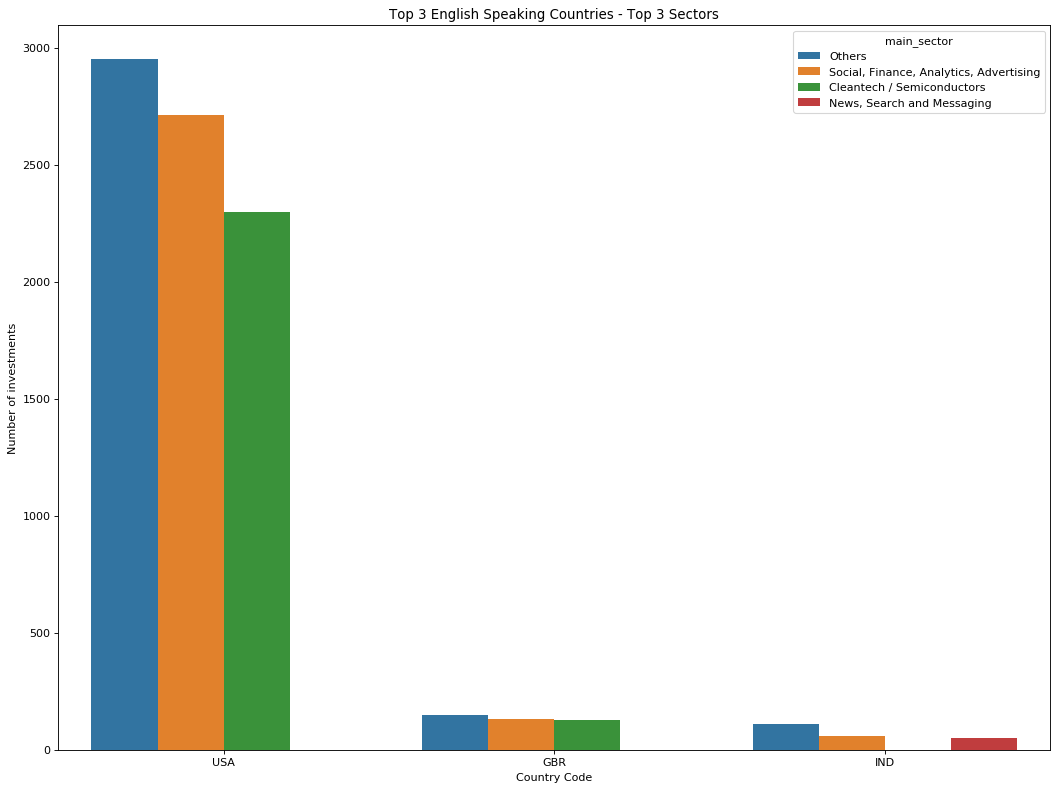

In [144]:
import seaborn as sns
fig = plt.figure(num=None, figsize=(16, 12), dpi=80, facecolor='w', edgecolor='k')

ind = np.arange(3)

# specify hue="categorical_variable"
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=final_top_3, linewidth=10, order=["USA", "GBR", "IND"])
LABELS = ["USA", "GBR", "IND"]
plt.xlabel("Country Code")
plt.ylabel("Number of investments")
plt.xticks(ind, LABELS)
plt.title("Top 3 English Speaking Countries - Top 3 Sectors")
plt.show()
fig.savefig('Fig3.png')